In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime

In [ ]:
df=pd.read_csv('/content/CL-DA.csv', sep=';', header =0 ,encoding='latin-1' , parse_dates=['create_date'])

In [ ]:
df.head()

,id,create_date,rent_price,deposit,floor,area_total,rooms,region,repair_type,agent_fee
0,1,2021-12-06 09:54:22.001000+03:00,88400.0,NaN,2,63.2,2,1,NaN,NaN
1,2,2021-12-06 09:52:18.815000+03:00,88100.0,NaN,6,53.6,2,1,NaN,NaN
2,3,2021-12-06 09:48:26.329000+03:00,36000.0,NaN,9,39.0,1,1,NaN,NaN
3,4,2021-12-06 09:46:42.017000+03:00,35000.0,NaN,5,40.0,1,1,NaN,NaN
4,5,2021-12-06 09:45:50.589000+03:00,30000.0,NaN,8,28.0,0,2,NaN,NaN


In [ ]:
# df['create_date'] = df.apply(lambda row: pd.to_datetime(row['create_date'],format='%Y-%m-%d %H:%M:%S'),axis = 1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype                                
---  ------       --------------  -----                                
 0   id           5000 non-null   int64                                
 1   create_date  5000 non-null   datetime64[ns, pytz.FixedOffset(180)]
 2   rent_price   5000 non-null   float64                              
 3   deposit      4912 non-null   float64                              
 4   floor        5000 non-null   int64                                
 5   area_total   5000 non-null   object                               
 6   rooms        5000 non-null   int64                                
 7   region       5000 non-null   int64                                
 8   repair_type  4912 non-null   object                               
 9   agent_fee    4912 non-null   float64                              
dtypes: datetime64[ns, pytz.F

In [ ]:
df.deposit.describe()

count    4.912000e+03
mean     7.247456e+04
std      1.426763e+06
min      0.000000e+00
25%      3.000000e+04
50%      4.300000e+04
75%      6.000000e+04
max      1.000000e+08
Name: deposit, dtype: float64

In [ ]:
df['deposit'].fillna(0, inplace = True)

In [ ]:
df= df.astype({'deposit': np.int})

<ipython-input-10-0e5de3177ec5>:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df= df.astype({'deposit': np.int})


In [ ]:
df.repair_type.value_counts()

cosmetic    2068
euro        2040
design       589
unknown      170
no            45
Name: repair_type, dtype: int64

In [ ]:
df['repair_type'].fillna('unknown', inplace = True)

In [ ]:
df.isnull().sum()

id              0
create_date     0
rent_price      0
deposit         0
floor           0
area_total      0
rooms           0
region          0
repair_type     0
agent_fee      88
dtype: int64

In [ ]:
df[df.duplicated()]

,id,create_date,rent_price,deposit,floor,area_total,rooms,region,repair_type,agent_fee


In [ ]:
df.area_total.describe()

count     5000
unique     467
top       40.0
freq       350
Name: area_total, dtype: object

In [ ]:
df.area_total.value_counts()

40.0    350
38.0    234
45.0    226
35.0    193
60.0    151
       ... 
44.3      1
70.6      1
66.8      1
93.4      1
58.2      1
Name: area_total, Length: 467, dtype: int64

In [ ]:
df['area_total'] = df['area_total'].str.replace(r"[^\d\.]", "", regex=True)

In [ ]:
df['area_total'] = pd.to_numeric(df['area_total'], errors='coerce')

In [ ]:
df.area_total.info()

<class 'pandas.core.series.Series'>
RangeIndex: 5000 entries, 0 to 4999
Series name: area_total
Non-Null Count  Dtype  
--------------  -----  
5000 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB


In [ ]:
df.area_total.describe()

count     5000.000000
mean        59.313420
std        636.152459
min         12.000000
25%         37.000000
50%         44.000000
75%         58.000000
max      45000.000000
Name: area_total, dtype: float64

In [ ]:
df.agent_fee.describe()

count    4912.000000
mean       42.043770
std        32.951788
min         0.000000
25%         0.000000
50%        50.000000
75%        50.000000
max       100.000000
Name: agent_fee, dtype: float64

In [ ]:
df['agent_fee'].fillna(df['agent_fee'].mean(), inplace = True)

In [ ]:
for col in df.columns:
    pct_missing = np.mean(df[col].isna())
    print(f'{col} - {round(pct_missing * 100)}%')

id - 0%
create_date - 0%
rent_price - 0%
deposit - 0%
floor - 0%
area_total - 0%
rooms - 0%
region - 0%
repair_type - 0%
agent_fee - 0%


In [ ]:
df.describe()

,id,rent_price,deposit,floor,area_total,rooms,region,agent_fee
count,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,56969.306000,7.119901e+04,7.405400,59.313420,1.615600,1.250200,42.043770
std,1443.520003,41921.368672,1.414181e+06,5.627769,636.152459,0.885208,0.433171,32.660466
min,1.000000,6300.000000,0.000000e+00,1.000000,12.000000,-1.000000,1.000000,0.000000
25%,1250.750000,35000.000000,3.000000e+04,3.000000,37.000000,1.000000,1.000000,0.000000
50%,2500.500000,45000.000000,4.200000e+04,6.000000,44.000000,2.000000,1.000000,50.000000
75%,3750.250000,60000.000000,6.000000e+04,10.000000,58.000000,2.000000,2.000000,50.000000
max,5000.000000,300000.000000,1.000000e+08,55.000000,45000.000000,6.000000,2.000000,100.000000


In [ ]:
df.region.value_counts()

1    3749
2    1251
Name: region, dtype: int64

In [ ]:
dummies=pd.get_dummies(df.repair_type)
df=pd.concat([df, dummies], axis = 1)

In [ ]:
df.drop('repair_type', axis = 1,  inplace = True)

In [ ]:
df.head(5)

,id,create_date,rent_price,deposit,floor,area_total,rooms,region,agent_fee,cosmetic,design,euro,no,unknown
0,1,2021-12-06 09:54:22.001000+03:00,88400.0,0,2,63.2,2,1,42.04377,0,0,0,0,1
1,2,2021-12-06 09:52:18.815000+03:00,88100.0,0,6,53.6,2,1,42.04377,0,0,0,0,1
2,3,2021-12-06 09:48:26.329000+03:00,36000.0,0,9,39.0,1,1,42.04377,0,0,0,0,1
3,4,2021-12-06 09:46:42.017000+03:00,35000.0,0,5,40.0,1,1,42.04377,0,0,0,0,1
4,5,2021-12-06 09:45:50.589000+03:00,30000.0,0,8,28.0,0,2,42.04377,0,0,0,0,1


In [ ]:
df['create_date'].value_counts()

2021-12-06 09:54:22.001000+03:00    1
2021-12-03 01:23:17.260000+03:00    1
2021-12-03 01:15:55.724000+03:00    1
2021-12-03 01:16:02.914000+03:00    1
2021-12-03 01:17:47.902000+03:00    1
                                   ..
2021-12-04 15:07:58.804000+03:00    1
2021-12-04 15:08:13.429000+03:00    1
2021-12-04 15:08:14.326000+03:00    1
2021-12-04 15:08:14.559000+03:00    1
2021-12-01 21:02:57.189000+03:00    1
Name: create_date, Length: 5000, dtype: int64

In [ ]:
df.corr()

<ipython-input-30-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,rent_price,deposit,floor,area_total,rooms,region,agent_fee,cosmetic,design,euro,no,unknown
id,1.000000,0.074525,-0.008348,0.005105,0.006506,0.041673,-0.001250,0.009575,-0.010298,0.018654,-0.012591,0.013641,0.017892
rent_price,0.074525,1.000000,0.034374,0.137437,0.020937,0.519374,-0.263215,-0.242007,-0.274299,0.342984,0.030775,-0.044597,0.061501
deposit,-0.008348,0.034374,1.000000,0.010924,0.000440,0.020534,-0.015398,0.018776,-0.019180,0.005102,0.018248,-0.002917,-0.004033
floor,0.005105,0.137437,0.010924,1.000000,0.004795,-0.025130,-0.013881,-0.085563,-0.136714,0.112480,0.072606,-0.032080,-0.007164
area_total,0.006506,0.020937,0.000440,0.004795,1.000000,0.019370,-0.010989,-0.010685,-0.017789,0.000788,0.017845,-0.001920,-0.000373
rooms,0.041673,0.519374,0.020534,-0.025130,0.019370,1.000000,-0.170131,-0.060923,-0.046827,0.053559,-0.003597,0.012676,0.028779
region,-0.001250,-0.263215,-0.015398,-0.013881,-0.010989,-0.170131,1.000000,-0.149627,-0.029454,-0.011986,0.009012,0.018291,0.055207
agent_fee,0.009575,-0.242007,0.018776,-0.085563,-0.010685,-0.060923,-0.149627,1.000000,0.096568,-0.160543,0.001654,0.005968,0.012750
cosmetic,-0.010298,-0.274299,-0.019180,-0.136714,-0.017789,-0.046827,-0.029454,0.096568,1.000000,-0.306890,-0.697208,-0.080035,-0.195895
design,0.018654,0.342984,0.005102,0.112480,0.000788,0.053559,-0.011986,-0.160543,-0.306890,1.000000,-0.303360,-0.034824,-0.085235


* the most rent price correlate with design repair type and rooms quontity

Price range: 6300 - 300000
Mean price: 56969
Median price: 45000
Standard deviation: 41921


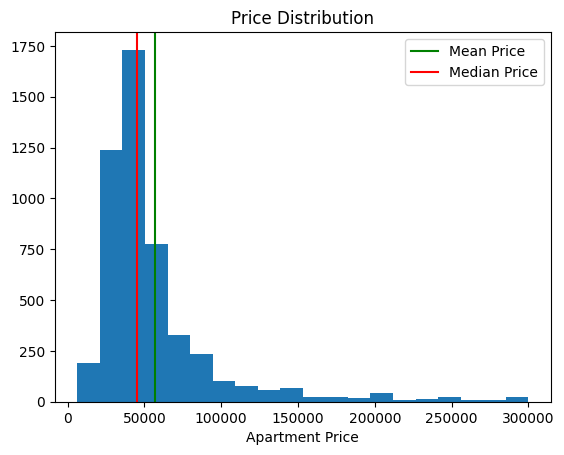

In [ ]:
mean_price = int(df['rent_price'].mean())
median_price = int(df['rent_price'].median())

std = int(df['rent_price'].std())

min_price = int(df['rent_price'].min())
max_price = int(df['rent_price'].max())

print(f'Price range: {min_price} - {max_price}')
print(f'Mean price: {mean_price}\nMedian price: {median_price}')
print(f'Standard deviation: {std}')

plt.hist(df['rent_price'], bins=20)
plt.axvline(mean_price, label='Mean Price', color='green')
plt.axvline(median_price, label='Median Price', color='red')
plt.legend()
plt.xlabel('Apartment Price')
plt.title('Price Distribution')
plt.show()

<ipython-input-32-367259b8e7e3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), center=0, cmap='mako', annot=True)


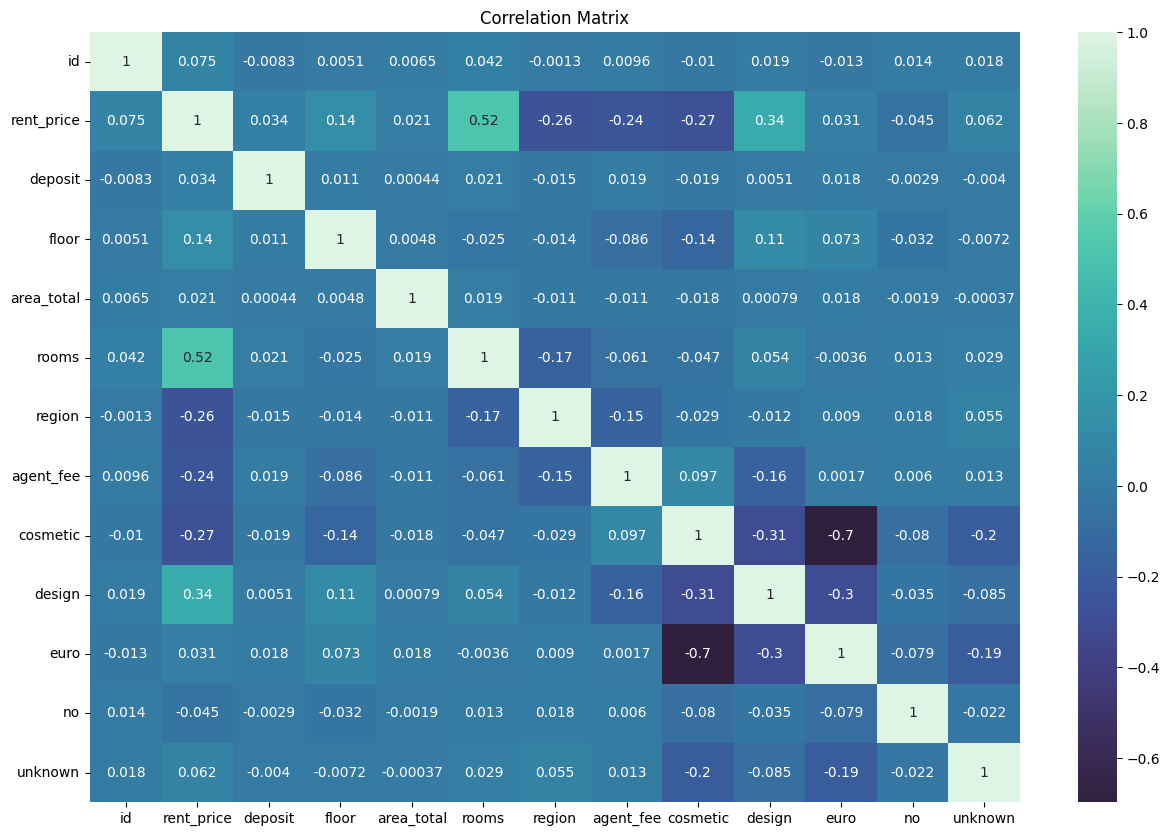

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), center=0, cmap='mako', annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
model1 = RandomForestClassifier()

In [ ]:
x = df.drop(['rent_price','create_date'], axis = 1)
y = df['rent_price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=1)

In [ ]:
model1.fit(X_train, y_train)

RandomForestClassifier()

* тут можно завести переменную с конкретными параметрами (словарь), для которой по обученной модели можно выстроить предсказание
example = {'deposit': [50000],
 'floor': [4],
example_df = pd.DataFrame(example)
model.predict(example_df)

In [ ]:
prediction1 = model1.predict(X_test)
len(prediction1)

1000

In [ ]:
print(f'R^2 score: {r2_score(y_test, prediction1):.3f}')

R^2 score: 0.897


In [ ]:
model2 = xgb.XGBRegressor()
model2.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
prediction2 = model2.predict(X_test)

In [ ]:
len(prediction2)

1000

In [ ]:
print(f'R^2 score: {r2_score(y_test, prediction2):.3f}')

R^2 score: 0.948


In [ ]:
X_test.loc[:, 'Predict1'] = prediction1
X_test.loc[:, 'Predict2'] = prediction2
X_test.head(5)

,id,deposit,floor,area_total,rooms,region,agent_fee,cosmetic,design,euro,no,unknown,Predict1,Predict2
2764,2765,35000,4,19.0,1,1,0.0,1,0,0,0,0,35000.0,35225.671875
4767,4768,35000,19,39.0,1,2,0.0,0,0,1,0,0,35000.0,34412.750000
3814,3815,130000,5,95.0,2,1,0.0,0,1,0,0,0,130000.0,130381.875000
3499,3500,26000,3,18.0,0,1,30.0,1,0,0,0,0,28000.0,25958.380859
2735,2736,85000,3,56.0,2,2,50.0,0,1,0,0,0,70000.0,88105.406250


In [ ]:
pred=df[['id','floor','deposit','rooms','area_total','rent_price']]
xtestdf = X_test[['id','Predict1', 'Predict2']]

In [ ]:
final_data = pd.merge(pred,xtestdf, on=['id'])

In [ ]:
final_data.head(5)

,id,floor,deposit,rooms,area_total,rent_price,Predict1,Predict2
0,6,8,0,1,33.0,35000.0,35000.0,36245.015625
1,12,4,0,1,45.0,35000.0,35000.0,39147.250000
2,13,6,35000,1,38.0,35000.0,35000.0,36317.339844
3,14,6,0,3,90.0,80000.0,70000.0,88368.414062
4,18,14,0,2,50.0,80000.0,88100.0,71735.117188
